# EM Algorithm

## Batch EM

**Import necessary libraries**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

**Load Data**

In [2]:
data = scipy.io.loadmat('mnist_small.mat')
X = data['X']
Y = data['Y']

**Print Data Shape**

In [3]:
print(X.shape, Y.shape)

(10000, 784) (10000, 1)


**GMM Algorithm**

In [4]:
def gmm(X, K):
    [N, D] = X.shape
    
    if K >= N:
        print('you are trying to make too many clusters!')
        return
    
    numIter = 200 # maximum number of iterations to run
    
    si2 = 1 # initialize si2 dumbly
    
    pk = np.ones(K) / K # initialize pk uniformly
    
    mu = np.random.rand(K, D) # initialize means randomly
    z = np.zeros((N, K))
    
    for iteration in range(numIter):
        # in the first step, we do assignments: 
        # each point is probabilistically assigned to each center
        
        for n in range(N):
            for k in range(K):
                # TBD: compute z(n,k) = log probability that 
                # the nth data point belongs to cluster k
                z[n][k] = np.log(pk[k]) - np.linalg.norm(X[n] - mu[k])**2 / (2*si2)
            
            # turn log probabilities into actual probabilities
            maxZ = np.max(z[n])
            z[n] = np.exp(z[n] - maxZ - np.log(np.sum(np.exp(z[n] - maxZ))))
        
        
        nk = np.sum(z, axis=0)
        # re-estimate pk
        pk = nk/N
        
        # re-estimate the variance
        mu = z.T@X
        mu = np.array([mu[k]/nk[k] for k in range(K)])
        
        # re-estimate the variance
        si2 = np.sum(np.square(X - z@mu))/(N*D)

    return mu, pk, z, si2

**Running GMM for k = 5, 10, 15, 20**

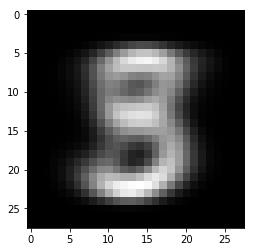

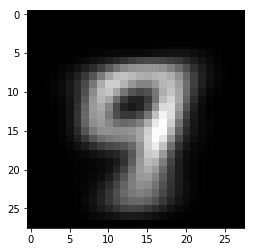

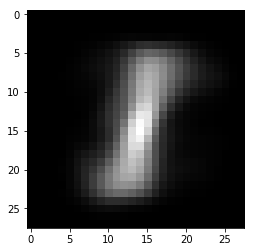

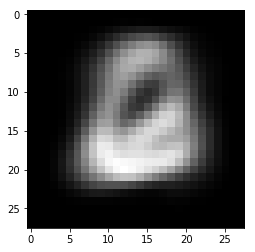

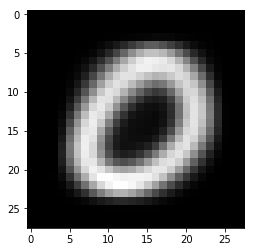

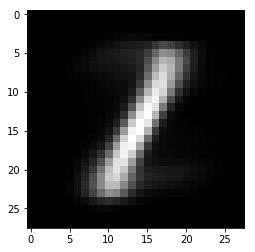

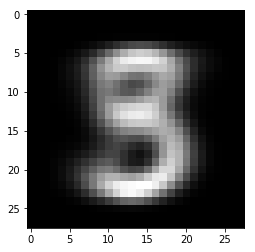

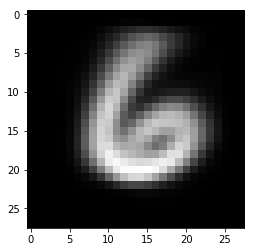

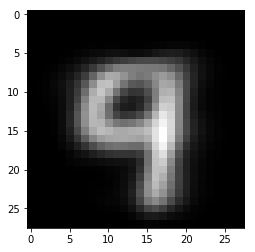

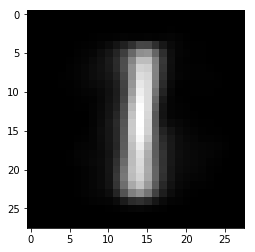

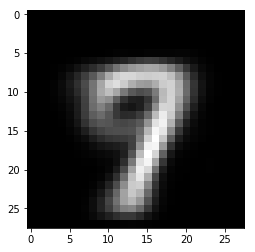

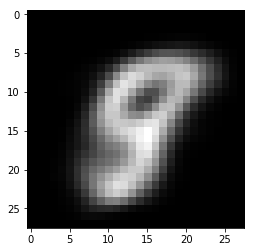

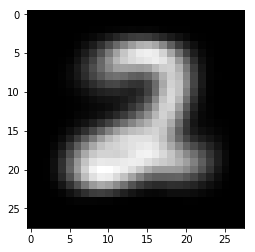

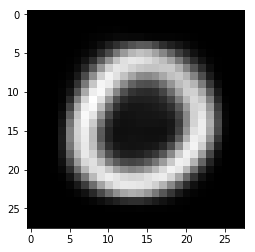

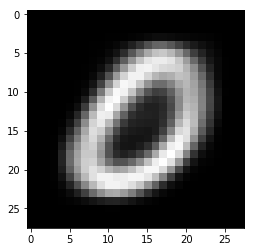

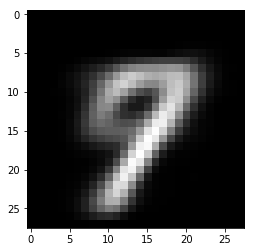

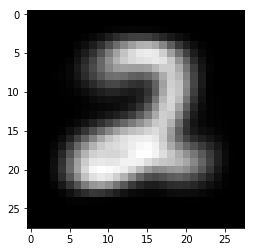

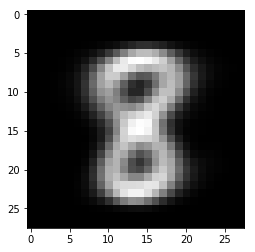

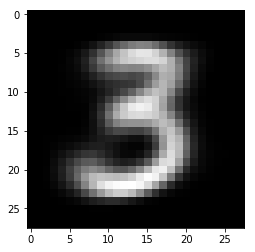

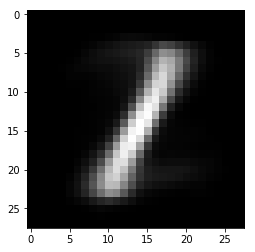

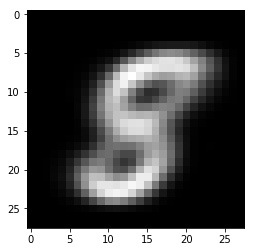

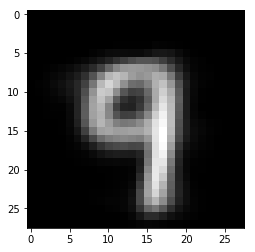

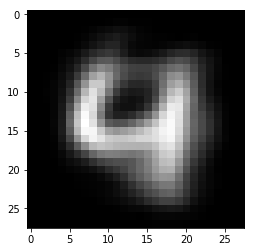

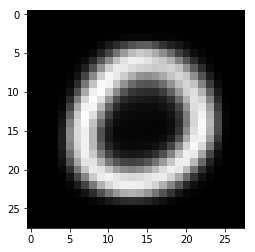

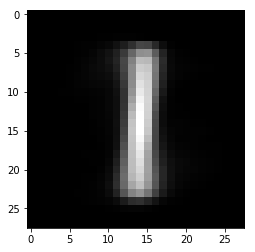

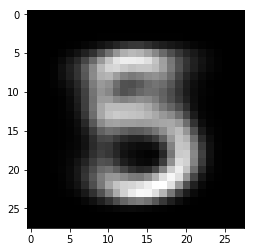

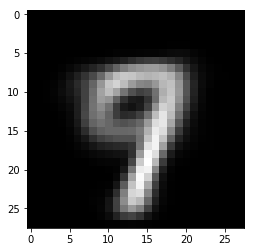

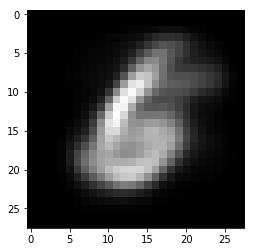

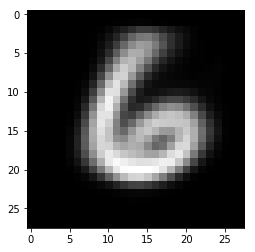

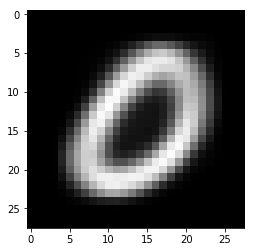

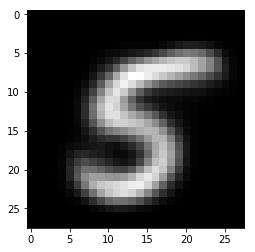

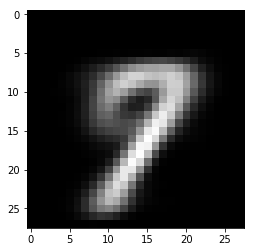

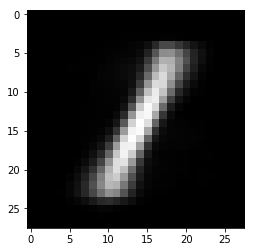

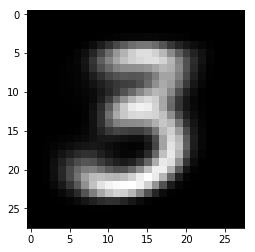

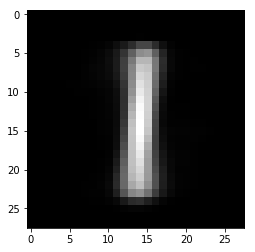

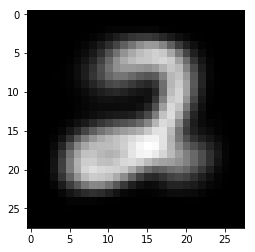

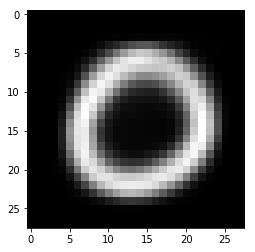

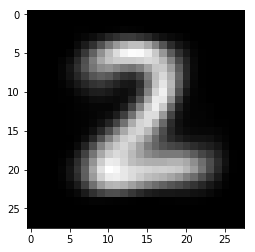

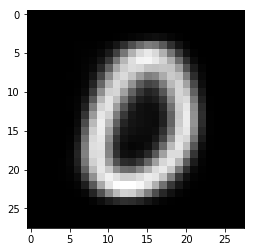

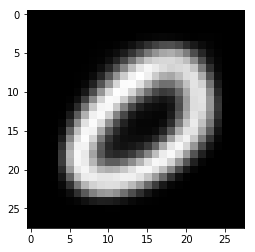

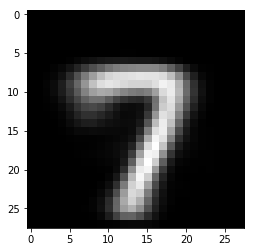

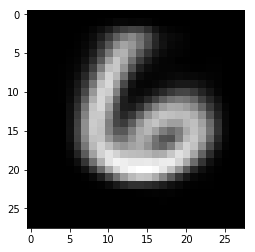

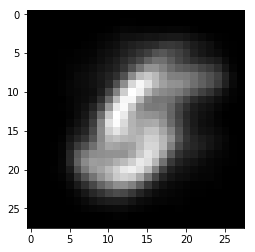

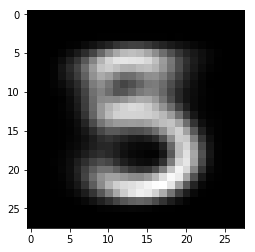

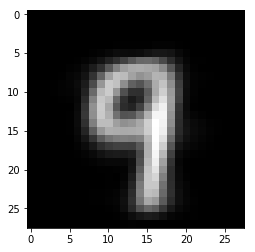

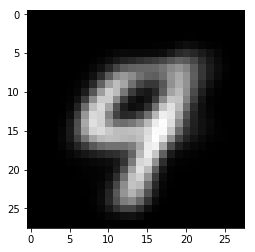

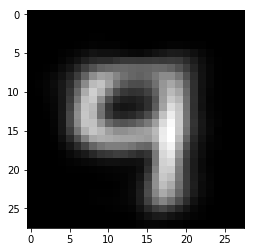

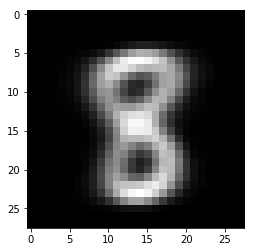

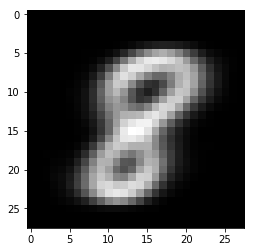

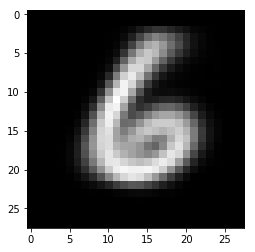

In [8]:
for k in [5, 10, 15, 20]:
    mu, pk, z, si2 = gmm(X, k) # calling the function
    # printing mean
    for i in range(k):
        plt.imshow(mu[i].reshape((28, 28)), cmap='gray')
        plt.savefig('figure '+str(i+1)+' for k_'+str(k))
        plt.show()

## Online EM

**Online GMM algorithm**

In [39]:
def online_gmm(X, K):
    batch_size = 100 # the batch size for onlineEM
    kappa = 0.55 # kappa for learning rate
    numIter = 200 # total number of iterations
    np.random.shuffle(X) # randomly shuffle X to include examples from all digits
    X = X[:batch_size] # select the first 100 of 100
    [N, D] = X.shape # N and D from X
    
    if K >= N:
        print('you are trying to make too many clusters!')
        return
    
    # initialize si2 dumbly
    si2 = 1

    # initialize pk uniformly
    pk = np.ones(K) / K
    
    # we initialize the means totally randomly
    mu = np.random.rand(K, D)
    
    z = np.zeros((N, K))
    

    
    for iteration in range(numIter):
        learning_rate = (iteration + 1)**(-0.55) # learning for rate for the iteration
        
        for n in range(N):
            for k in range(K):
                # TBD: compute z(n,k) = log probability that 
                # the nth data point belongs to cluster k
                z[n][k] = np.log(pk[k]) - np.linalg.norm(mu[k] - X[n])**2 / (2*si2)
            maxZ   = np.max(z[n])
            # turn log probabilities into actual probabilities
            z[n] = np.exp(z[n] - maxZ - np.log(np.sum(np.exp(z[n] - maxZ))))
        
        nk = np.sum(z, axis=0)
        # re-estimate pk
        pk = (1-learning_rate)*pk + learning_rate*nk/N
        
        mu_prev = mu
        mu = z.T@X
        mu = (1-learning_rate)*mu_prev + learning_rate*np.array([mu[k]/nk[k] if nk[k] is not 0 else mu_prev for k in range(K)])
        
        
        si2 = np.sum(np.square(X - z@mu))/(N*D)
    return mu, pk, si2

**Running Online GMM for k = 5, 10, 15, 20**

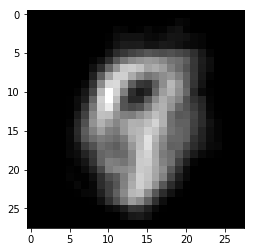

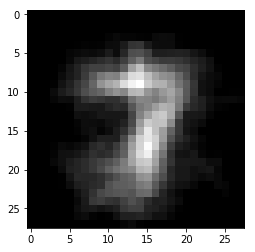

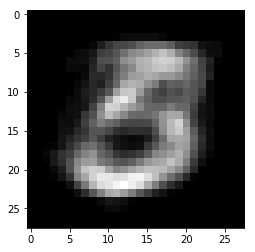

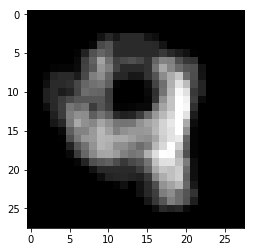

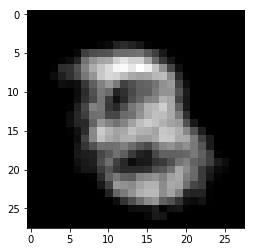

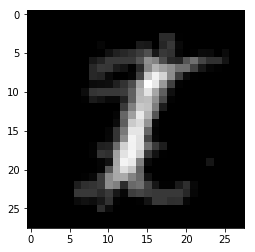

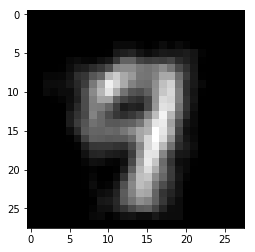

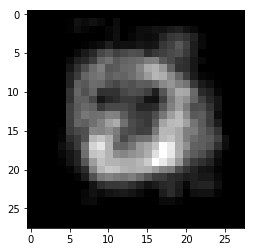

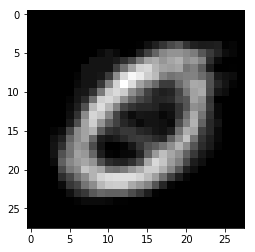

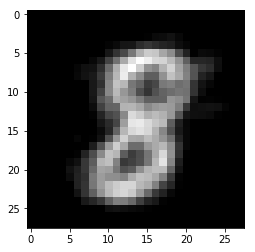

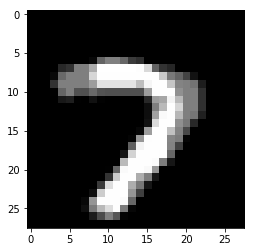

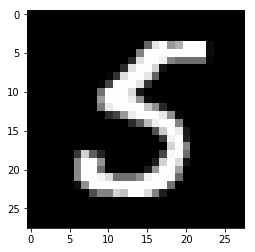

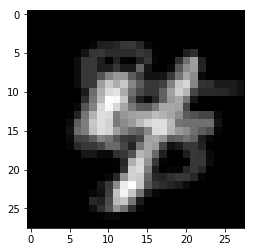

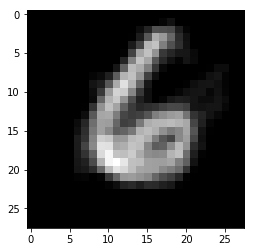

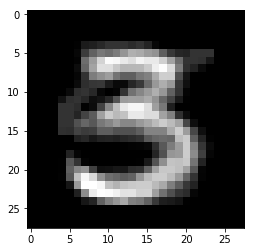

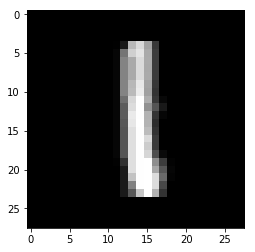

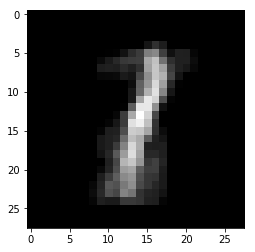

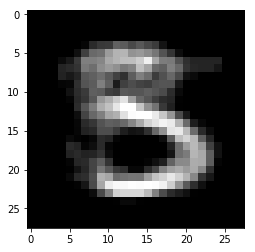

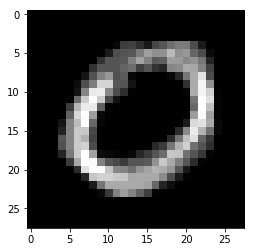

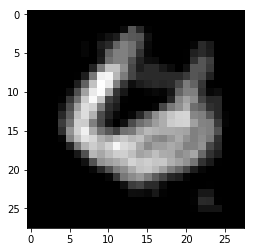

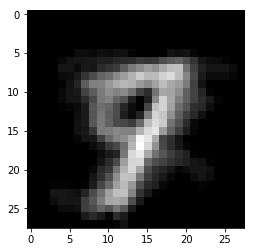

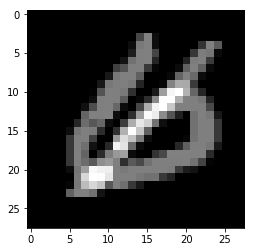

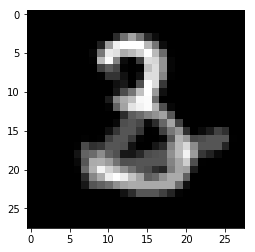

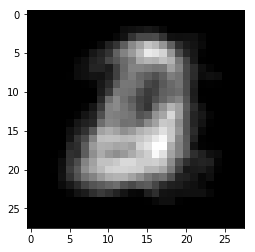

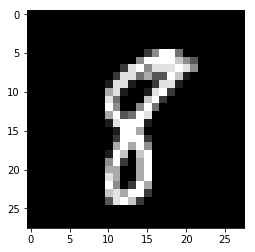

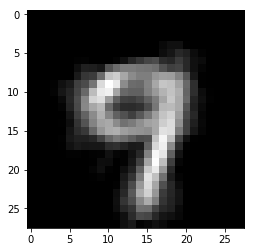

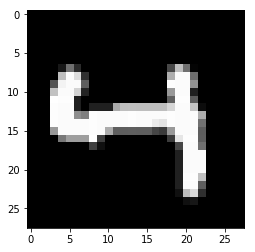

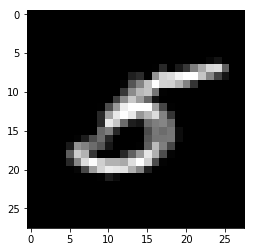

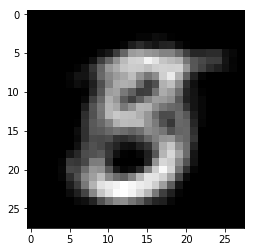

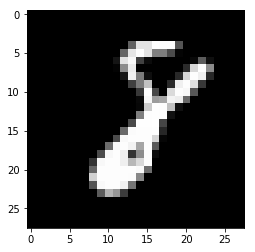

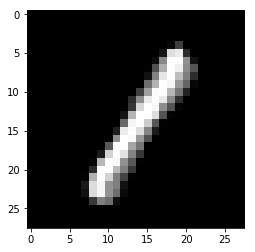

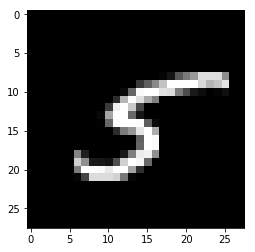

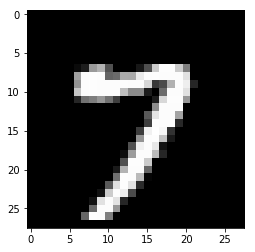

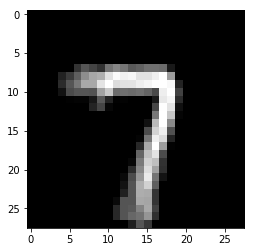

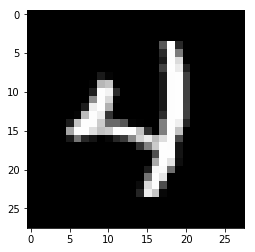

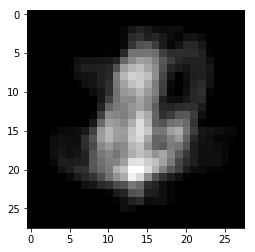

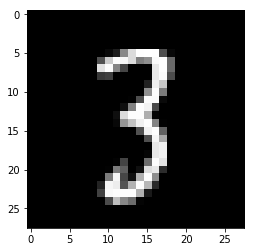

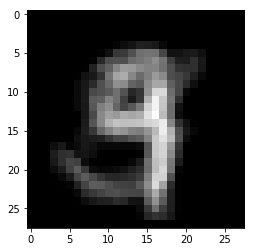

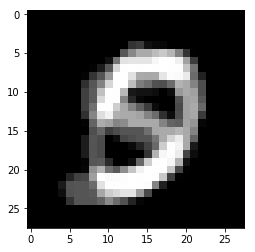

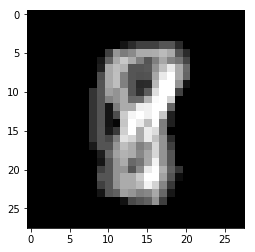

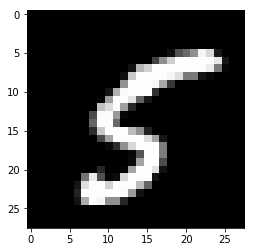

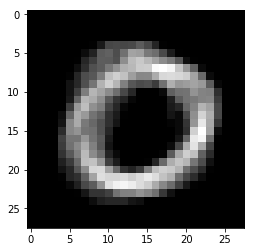

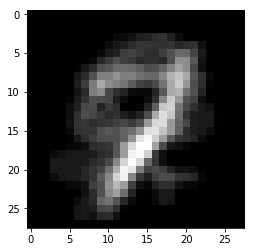

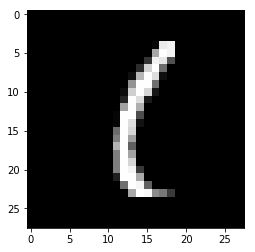

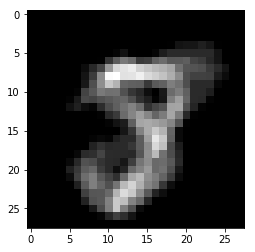

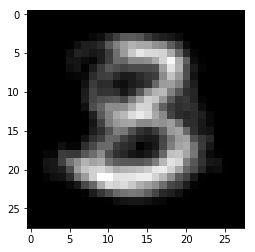

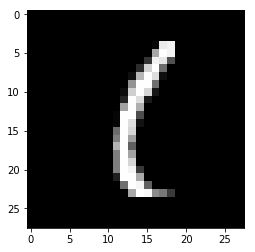

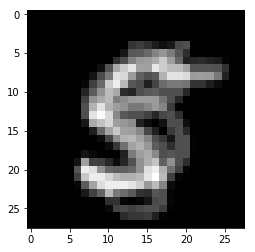

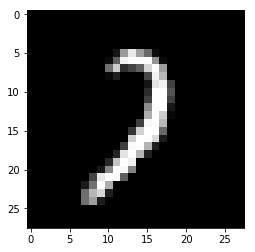

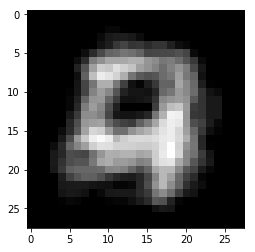

In [40]:
for k in [5, 10, 15, 20]:
    mu, pk, si2 = online_gmm(X, k) # calling the function
    # printing mean
    for i in range(k):
        plt.imshow(mu[i].reshape((28, 28)), cmap='gray')
#         plt.savefig('onlineEM_figure '+str(i+1)+' for k_'+str(k))
        plt.show()